# 1. 데이터 가져오기

In [70]:
import pandas as pd
total_data = pd.read_excel('tech_scraping.xlsx')
total_data.head(10)

,star grade,review
0,1.5,둘다 *근에 팔았어요.\n\n와치페이스 최악\n문의답변도 성의 없고 너무 오래 걸리...
1,5.0,사용한지 꽤 지나서 평가를 남기게 되었네요~^^;;\n아마 와디즈 첫 펀딩이라 평가...
2,5.0,첫 스마트워치인데 워치페이스 커스텀편집이 안되는것 빼면 만족하고 사용중입니다.
3,2.5,다양한 기능이 있지만 정상적으로 잘동하지 않는경우가 많아요...\n그리고 워치페이스...
4,4.0,기능적으로 만족합니다. 별도로 구입한 메탈스트랩은 아쉽네요.
5,1.0,추가 밴드가 불량입니다. 펀딩 이후 곧바로 시중에서 더 저렴하게 구매가 가능했네요.
6,3.5,화면이 아쉽지만 그냥 쓸만합니다
7,2.0,싸게 잘 산 것 뿐
8,4.0,첫 스마트워치라 그런지 별 불만 없이 잘 사용하고 있어요. 복잡한 기능을 원한 것도...
9,2.5,가성비 좋을 줄 알았는데 그저 그러해서 아쉬웠네요


In [71]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15468 entries, 0 to 15467
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   star grade  15468 non-null  float64
 1   review      15468 non-null  object 
dtypes: float64(1), object(1)
memory usage: 241.8+ KB


In [72]:
len(total_data)  # null 값 없음을 알수있다.

15468

# 2. 데이터 전처리

In [73]:
x_data = total_data['review']
y_data = total_data['star grade']

## y_data 전처리
: rate의 범위를 [1,2,3,4,5]로 만들기 위해 소수점 rate 처리

In [74]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [75]:
y_data = y_data.apply(lambda val:make_y_data(val))

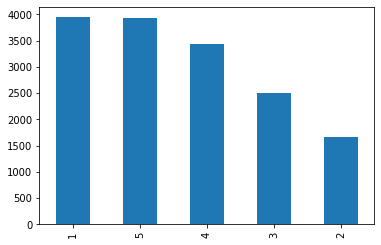

In [76]:
y_data.value_counts().plot(kind='bar')

In [77]:
y_data

0        1
1        5
2        5
3        2
4        4
        ..
15463    5
15464    5
15465    5
15466    5
15467    5
Name: star grade, Length: 15468, dtype: int64

## Split data

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11601,), (11601,), (3867,), (3867,))

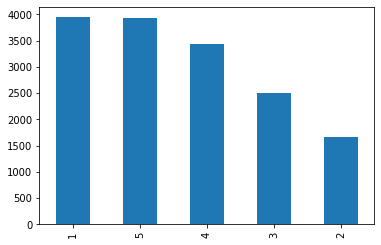

In [80]:
y_data.value_counts().plot(kind='bar')

## NPL (테스트 전처리)

In [81]:
# !python -m pip install --upgrade pip

In [82]:
# !python -m pip install konlpy 

In [83]:
# !curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [84]:
# !bash ./mecab.sh

In [85]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

11381                        가족들 모두 매일 몸상태를 체크할 수 있어서 좋습니다
878      오른쪽 간헐적으로 꺼졌다 켜지고 그러는데 어찌해야합니까꺼졌다 켜지면 자동으로 페어링...
14083    리버티프로 받아서 사용하고 있는데요 음질은 너무 좋은데 지하철에서 끊김이 좀 있네요...
7383     제품은 대단히 만족합니다 다만 한글 설명서 만든다고 해서 기대했는데 제가 생각한 사...
5836     최근 오류가 많이 발생합니다 채널 이동 시 딜래이 발생이 길어짐 채널 이동 후 한번...
                               ...                        
917      우여곡절 많았던 제품인데생각보다 양품이긴 합니다음질이 좋은지는 모르겠고블루투스 연결...
11202    안좋다는 후기가 많아서 걱정했는데 생각보다 소음도 심하지 않고 팬도 잘 돌아갑니다 ...
14735    이런 문제점이 많은데 검수 자체를 하지않았다는 결론이네요 두개중에 하나라도 되야하는...
9575     인생 첫  프린터로 이것저것 뽑아 보고 있습니다일이 바쁜지라 받고 조립한지 일주일만...
4532     맥북을 사용하는 느낌입니다펀딩과정중에 커뮤니케이션에 대한 댓글을 접하는데놀랍게도 피...
Name: review, Length: 11601, dtype: object

In [86]:
from konlpy.tag import Mecab

In [87]:
mecab = Mecab()

In [88]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [89]:
import pickle

In [90]:
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [91]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['가족', '모두', '매일', '몸', '상태', '체크', '할', '어서', '습니다', '.'],
 ['오른쪽',
  '간헐',
  '꺼졌',
  '다',
  '켜',
  '고',
  '는데',
  '어찌',
  '해야',
  '합니까',
  '꺼졌',
  '다',
  '켜',
  '면',
  '자동',
  '페어링',
  '도',
  '됨',
  'ㅡㅡ',
  '교환',
  '해',
  '세요',
  '검수',
  '해서',
  '보냈',
  '다면서',
  '어떻게',
  '검수',
  '건지'],
 ['리버티',
  '2',
  '프로',
  '아서',
  '사용',
  '고',
  '는데요',
  '음질',
  '너무',
  '은데',
  '지하철',
  '에서',
  '끊김',
  '네요',
  '.',
  '..',
  '부분',
  '고',
  '괜찮',
  '게',
  '쓰',
  '고',
  '습니다',
  '.'],
 ['제품',
  '대단히',
  '만족',
  '합니다',
  '.',
  '다만',
  '한글',
  '설명서',
  '만든다고',
  '해서',
  '기대',
  '했',
  '는데',
  ',',
  '제',
  '사용',
  '설명서',
  '라',
  '단순',
  '제품',
  '설치',
  '대한',
  '간단',
  '설명서',
  '라서',
  '아쉽',
  '네요',
  '.',
  '예전',
  '도',
  '문',
  '드렸',
  '지만',
  '앱',
  '설명서',
  '도',
  '지만',
  'pc',
  '프로그램',
  '연동',
  '해서',
  '제품',
  '사용',
  '가능',
  '상세',
  '방법',
  '을',
  '알려',
  '시',
  '면',
  '감사',
  '겠',
  '습니다',
  '.',
  '아주',
  '오랫동안',
  '기다렸',
  '는데',
  '각',
  '개인',
  '능력',
  '각개',
  '전투',
  '듯',
  '앱',
  '만'

## Tokenizer

In [92]:
import tensorflow as tf

In [93]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [94]:
tokenizer.fit_on_texts(sentence)

In [95]:
tokenizer.word_index

{'.': 1,
 '고': 2,
 '도': 3,
 '을': 4,
 '습니다': 5,
 '네요': 6,
 '게': 7,
 ',': 8,
 '는데': 9,
 '제품': 10,
 '사용': 11,
 '했': 12,
 '면': 13,
 '해': 14,
 '로': 15,
 '다': 16,
 '합니다': 17,
 '어': 18,
 '만': 19,
 '에서': 20,
 '기': 21,
 '지만': 22,
 '겠': 23,
 '거': 24,
 '..': 25,
 '었': 26,
 '할': 27,
 '았': 28,
 '너무': 29,
 '쓰': 30,
 '!': 31,
 '어요': 32,
 '?': 33,
 '펀딩': 34,
 '만족': 35,
 '입니다': 36,
 '시': 37,
 '니': 38,
 '부분': 39,
 '해서': 40,
 '아': 41,
 '아요': 42,
 '보다': 43,
 '충전': 44,
 '1': 45,
 '2': 46,
 '저': 47,
 '분': 48,
 '라': 49,
 '어서': 50,
 ')': 51,
 '소음': 52,
 '(': 53,
 '던': 54,
 '서': 55,
 '3': 56,
 '인': 57,
 '음': 58,
 '제': 59,
 '~': 60,
 '-': 61,
 '아서': 62,
 '으면': 63,
 '정말': 64,
 '연결': 65,
 '많이': 66,
 '까지': 67,
 '가격': 68,
 '그냥': 69,
 '건': 70,
 '환불': 71,
 '듯': 72,
 '다고': 73,
 '조금': 74,
 '배송': 75,
 '못': 76,
 '구매': 77,
 '긴': 78,
 '처음': 79,
 '디자인': 80,
 '기대': 81,
 '요': 82,
 '다는': 83,
 '디즈': 84,
 '봤': 85,
 '바람': 86,
 '괜찮': 87,
 '라고': 88,
 '된': 89,
 '기능': 90,
 '불편': 91,
 '다가': 92,
 '함': 93,
 '면서': 94,
 '인데': 95,
 '느낌': 9

In [96]:
tokenizer.word_counts

OrderedDict([('가족', 108),
             ('모두', 330),
             ('매일', 138),
             ('몸', 48),
             ('상태', 519),
             ('체크', 86),
             ('할', 3250),
             ('어서', 1794),
             ('습니다', 10127),
             ('.', 44692),
             ('오른쪽', 157),
             ('간헐', 42),
             ('꺼졌', 17),
             ('다', 4086),
             ('켜', 433),
             ('고', 19276),
             ('는데', 6535),
             ('어찌', 73),
             ('해야', 818),
             ('합니까', 53),
             ('면', 4727),
             ('자동', 162),
             ('페어링', 277),
             ('도', 12648),
             ('됨', 280),
             ('ㅡㅡ', 98),
             ('교환', 539),
             ('해', 4448),
             ('세요', 719),
             ('검수', 90),
             ('해서', 2276),
             ('보냈', 54),
             ('다면서', 10),
             ('어떻게', 334),
             ('건지', 678),
             ('리버티', 71),
             ('2', 2007),
             ('프로', 205),
           

In [97]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value  # 2 미만의 수

In [98]:
total_cnt, rare_cnt, rare_cnt/total_cnt, rare_freq/total_freq

(20041, 10938, 0.5457811486452772, 0.01988217108525097)

In [99]:
vocab_size = total_cnt - rare_cnt

In [100]:
vocab_size

9103

In [101]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [102]:
tokenizer.fit_on_texts(sentence)

In [103]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '고',
 4: '도',
 5: '을',
 6: '습니다',
 7: '네요',
 8: '게',
 9: ',',
 10: '는데',
 11: '제품',
 12: '사용',
 13: '했',
 14: '면',
 15: '해',
 16: '로',
 17: '다',
 18: '합니다',
 19: '어',
 20: '만',
 21: '에서',
 22: '기',
 23: '지만',
 24: '겠',
 25: '거',
 26: '..',
 27: '었',
 28: '할',
 29: '았',
 30: '너무',
 31: '쓰',
 32: '!',
 33: '어요',
 34: '?',
 35: '펀딩',
 36: '만족',
 37: '입니다',
 38: '시',
 39: '니',
 40: '부분',
 41: '해서',
 42: '아',
 43: '아요',
 44: '보다',
 45: '충전',
 46: '1',
 47: '2',
 48: '저',
 49: '분',
 50: '라',
 51: '어서',
 52: ')',
 53: '소음',
 54: '(',
 55: '던',
 56: '서',
 57: '3',
 58: '인',
 59: '음',
 60: '제',
 61: '~',
 62: '-',
 63: '아서',
 64: '으면',
 65: '정말',
 66: '연결',
 67: '많이',
 68: '까지',
 69: '가격',
 70: '그냥',
 71: '건',
 72: '환불',
 73: '듯',
 74: '다고',
 75: '조금',
 76: '배송',
 77: '못',
 78: '구매',
 79: '긴',
 80: '처음',
 81: '디자인',
 82: '기대',
 83: '요',
 84: '다는',
 85: '디즈',
 86: '봤',
 87: '바람',
 88: '괜찮',
 89: '라고',
 90: '된',
 91: '기능',
 92: '불편',
 93: '다가',
 94: '함',
 95: '면서',
 96: '인

In [104]:
pickle.dump(tokenizer, open('./tokenizer.pkl','wb'))

## x_train 숫자화

In [105]:
x_train = tokenizer.texts_to_sequences(sentence)

In [106]:
print(x_train[0:3])

[[897, 314, 719, 1636, 186, 1088, 28, 51, 6, 2], [655, 1781, 3167, 17, 218, 3, 10, 1230, 105, 1531, 3167, 17, 218, 14, 637, 377, 4, 372, 977, 177, 15, 120, 1041, 41, 1519, 4215, 310, 1041, 134], [1249, 47, 522, 63, 12, 3, 456, 143, 30, 121, 872, 21, 276, 7, 2, 26, 40, 3, 88, 8, 31, 3, 6, 2]]


In [107]:
hist_len = [len(words) for words in x_train]

(array([4.825e+03, 2.859e+03, 1.498e+03, 8.160e+02, 4.890e+02, 2.940e+02,
        2.010e+02, 1.380e+02, 1.090e+02, 7.800e+01, 5.900e+01, 4.000e+01,
        4.500e+01, 2.900e+01, 2.100e+01, 1.800e+01, 1.000e+01, 6.000e+00,
        7.000e+00, 1.300e+01, 2.000e+00, 7.000e+00, 4.000e+00, 6.000e+00,
        5.000e+00, 5.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000e+00, 2.77800e+01, 5.45600e+01, 8.13400e+01, 1.08120e+02,
        1.34900e+02, 1.61680e+02, 1.88460e+02, 2.15240e+02, 2.42020e+02,
        2.68800e+02, 2.95580e+02, 3.22360e+02, 3.49140e+02, 3.75920e+02,
        4.02700e+02, 4.29480e+02, 4.56260e+02, 4.83040e+02, 5.09820e+02,
        5.36600e+02, 5.63380e+02, 5.90160e+02, 6.16940e+02, 6.43720e+02,
        6.7

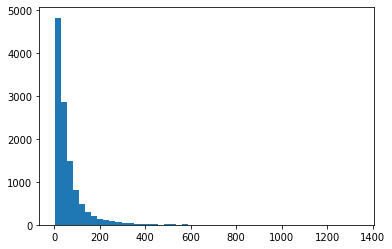

In [108]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

### padding

In [109]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)

In [110]:
x_train

array([[   0,    0,    0, ...,   51,    6,    2],
       [   0,    0,    0, ...,  310, 1041,  134],
       [   0,    0,    0, ...,    3,    6,    2],
       ...,
       [   0,    0,    0, ...,   15,   38,  253],
       [   0,    0,    0, ...,  170,   18,    2],
       [   0,    0,    0, ...,  690,   13,    6]], dtype=int32)

In [111]:
import numpy as np
y_train = np.array(y_train)-1
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [112]:
len(x_train),len(y_train)

(11601, 11601)

# 3. Make model

In [113]:
model = tf.keras.models.Sequential()

In [114]:
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=200))  # input layer

# model.add(tf.keras.layers.LSTM(128))  # hidden layer
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))  # hidden layer
model.add(tf.keras.layers.GRU(128))  # hidden layer

model.add(tf.keras.layers.Dense(5, activation='softmax'))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])  # gadget

In [115]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/100
32/32 [==============================] - 72s 2s/step - loss: 1.5629 - acc: 0.2988 - val_loss: 1.5142 - val_acc: 0.3364
Epoch 2/100
32/32 [==============================] - 68s 2s/step - loss: 1.3744 - acc: 0.4225 - val_loss: 1.2938 - val_acc: 0.4550
Epoch 3/100
32/32 [==============================] - 71s 2s/step - loss: 1.1544 - acc: 0.4994 - val_loss: 1.1944 - val_acc: 0.4823
Epoch 4/100
32/32 [==============================] - 62s 2s/step - loss: 1.0370 - acc: 0.5543 - val_loss: 1.1826 - val_acc: 0.4820
Epoch 5/100
32/32 [==============================] - 62s 2s/step - loss: 0.9519 - acc: 0.5881 - val_loss: 1.1846 - val_acc: 0.5093
Epoch 6/100
32/32 [==============================] - 63s 2s/step - loss: 0.8438 - acc: 0.6440 - val_loss: 1.2284 - val_acc: 0.4947
Epoch 7/100
32/32 [==============================] - 62s 2s/step - loss: 0.7738 - acc: 0.6821 - val_loss: 1.2968 - val_acc: 0.4723
Epoch 8/100
32/32 [==============================] - 62s 2s/step - loss: 0.7282 - a

# 4. Evaluation

In [116]:
model.evaluate(x_train, y_train)  # Bidirection epochs100 : - loss: 1.3254 - acc: 0.8286

363/363 [==============================] - 29s 79ms/step - loss: 1.3254 - acc: 0.8286


[1.3254203796386719, 0.8286354541778564]

# 5. Service

In [ ]:
model.save('./DL_culture.h5')